## Import package

In [74]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [75]:
def Missing_Counts( Data, NoMissing=True ) : 
    missing = Data.isnull().sum()  
    
    if NoMissing==False :
        missing = missing[ missing>0 ]
        
    missing.sort_values( ascending=False, inplace=True )  
    Missing_Count = pd.DataFrame( { 'Column Name':missing.index, 'Missing Count':missing.values } ) 
    Missing_Count[ 'Percentage(%)' ] = Missing_Count['Missing Count'].apply( lambda x: '{:.2%}'.format(x/Data.shape[0] ))
    return  Missing_Count

## Data Process

In [76]:
winequality_red_data = pd.read_csv('Data/winequality-red.csv', sep=';')
print('winequality_red Dataset')
winequality_red_data.head()

winequality_red Dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Check missing value

In [77]:
Missing_Counts(winequality_red_data).head()

,Column Name,Missing Count,Percentage(%)
0,fixed acidity,0,0.00%
1,volatile acidity,0,0.00%
2,citric acid,0,0.00%
3,residual sugar,0,0.00%
4,chlorides,0,0.00%


### EDA

In [78]:
X = winequality_red_data.drop(columns='quality')
y = winequality_red_data['quality']

In [79]:
import statsmodels.api as sm

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = sm.OLS(endog=y_train, exog=X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8654.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):                        0.00
Time:                        14:58:29   Log-Likelihood:                         -1266.6
No. Observations:                1279   AIC:                                      2555.
Df Residuals:                    1268   BIC:                                      2612.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

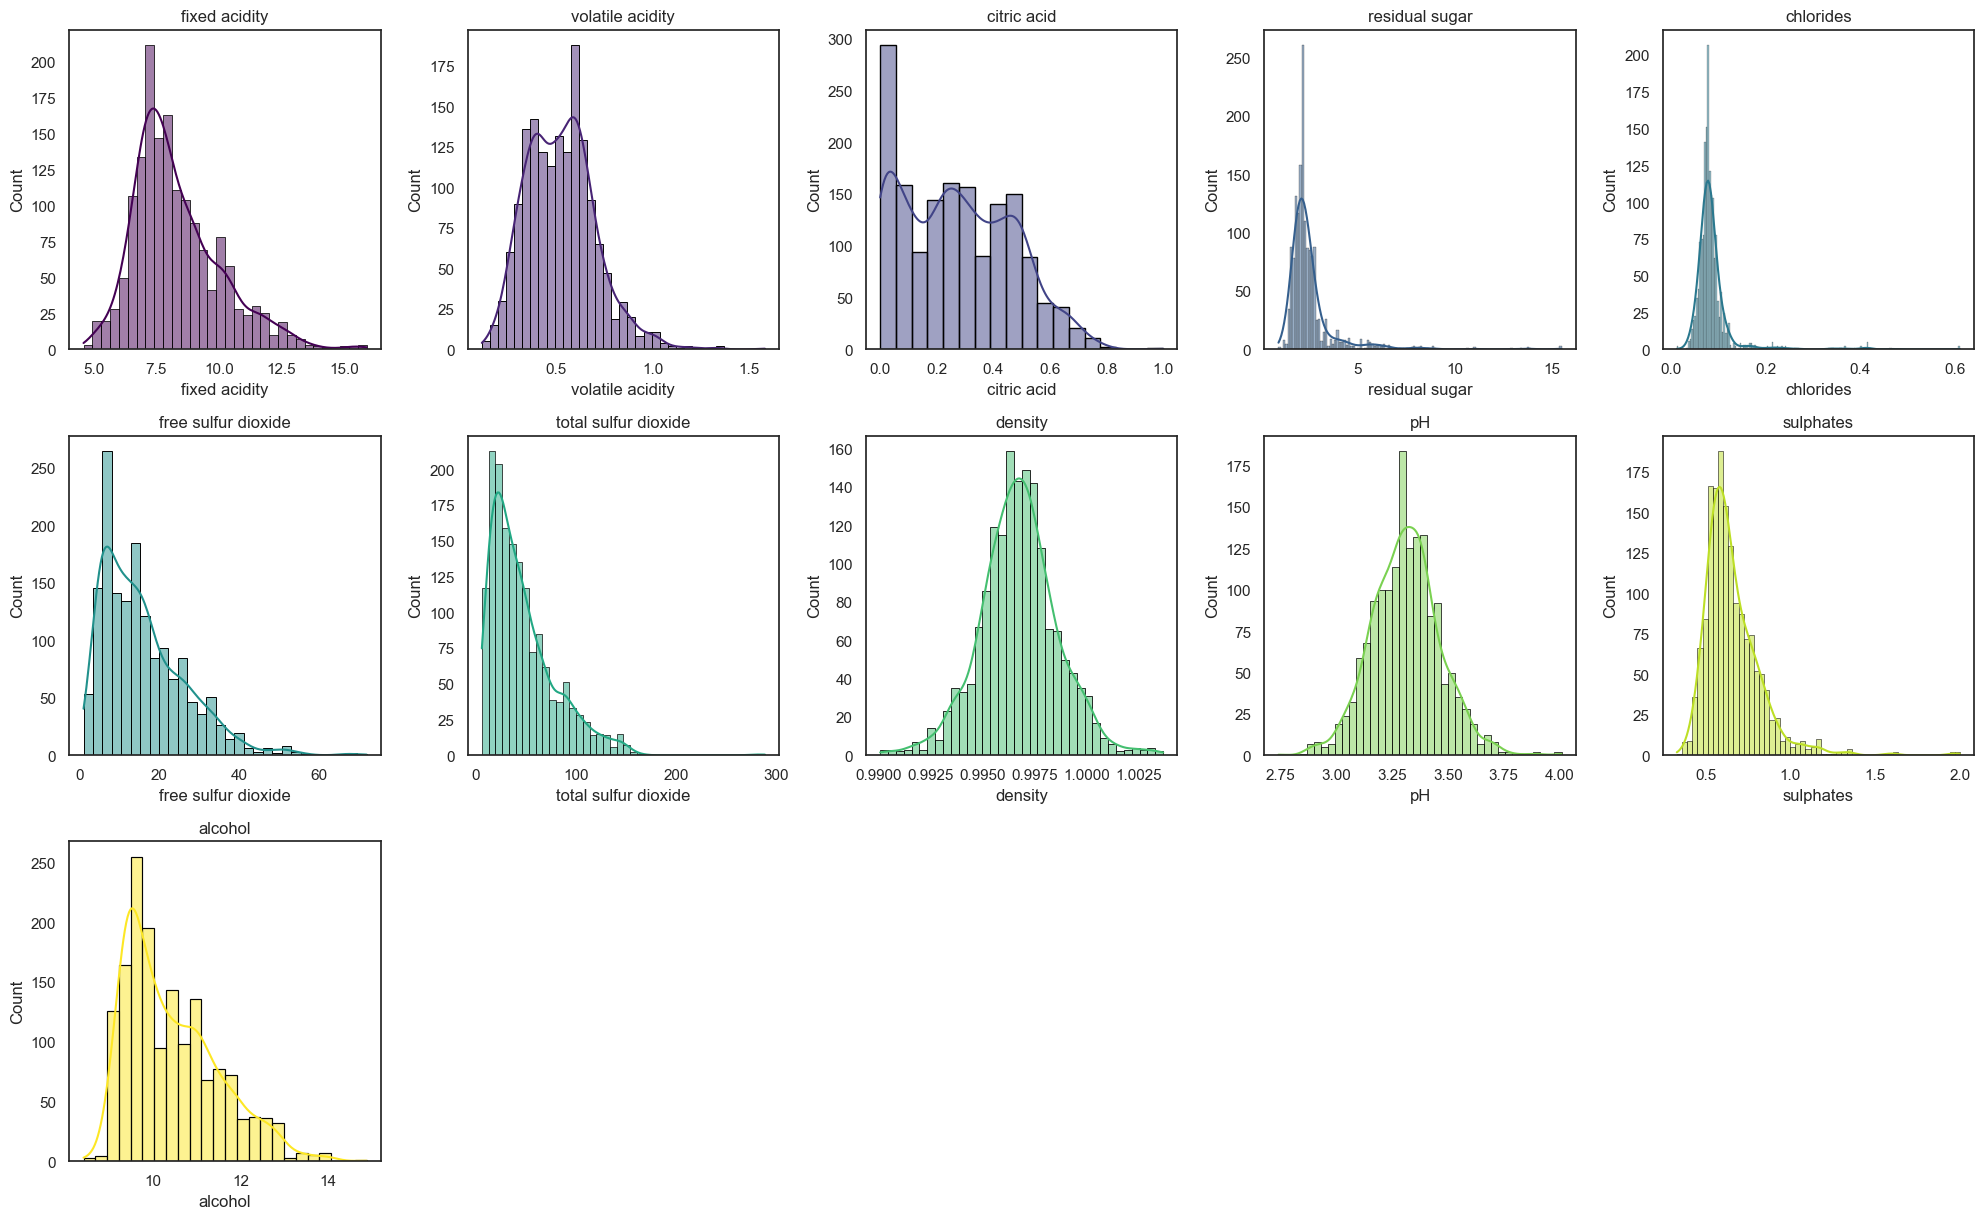

In [80]:
plt.figure(figsize=(20, 20))
sns.set(style="white", palette="muted")
colors = plt.cm.viridis(np.linspace(0, 1, len(X.columns)))

for i, col in enumerate(X.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(X[col], kde=True, color=colors[i], edgecolor="black")
    plt.title(col)
    plt.tight_layout()

plt.show()

數據解讀
>右偏分布：大多數特徵如 volatile acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, chlorides, sulphates 都呈現右偏的分布（即有較大的尾部值）。  

>近似正態分布：一些特徵如 density, pH 更接近正態分布，這樣的數據在進行 Z-score Normalization 時效果會比較好。  

>範圍差異：不同特徵的數據範圍相差很大。例如，free sulfur dioxide 和 total sulfur dioxide 的範圍明顯大於其他特徵。

### Feature Engineer - Normalization

針對右偏分布資料進行正規化。

In [81]:
from sklearn.preprocessing import MinMaxScaler

# 初始化 MinMaxScaler
scaler = MinMaxScaler()

# 假設你要對某些數值列進行正規化
columns_to_scale = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'sulphates']

# 使用 fit_transform 方法對這些列進行正規化
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.99780,3.51,0.137725,9.4
1,7.8,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.99680,3.20,0.209581,9.8
2,7.8,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.99700,3.26,0.191617,9.8
3,11.2,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.99800,3.16,0.149701,9.8
4,7.4,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.99780,3.51,0.137725,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.99490,3.45,0.149701,10.5
1595,5.9,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.99512,3.52,0.257485,11.2
1596,6.3,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.99574,3.42,0.251497,11.0
1597,5.9,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.99547,3.57,0.227545,10.2


### Feature Engineer - Transform

In [82]:
from sklearn.preprocessing import PowerTransformer

# 初始化 PowerTransformer 進行 Yeo-Johnson 變換
pt = PowerTransformer(method='yeo-johnson')

# 應用變換
columns_to_scale = ['volatile acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'sulphates']

# 使用 fit_transform 方法對這些列進行正規化
X[columns_to_scale] = scaler.fit_transform(X[columns_to_scale])

X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.99780,3.51,0.137725,9.4
1,7.8,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.99680,3.20,0.209581,9.8
2,7.8,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.99700,3.26,0.191617,9.8
3,11.2,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.99800,3.16,0.149701,9.8
4,7.4,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.99780,3.51,0.137725,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.99490,3.45,0.149701,10.5
1595,5.9,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.99512,3.52,0.257485,11.2
1596,6.3,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.99574,3.42,0.251497,11.0
1597,5.9,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.99547,3.57,0.227545,10.2


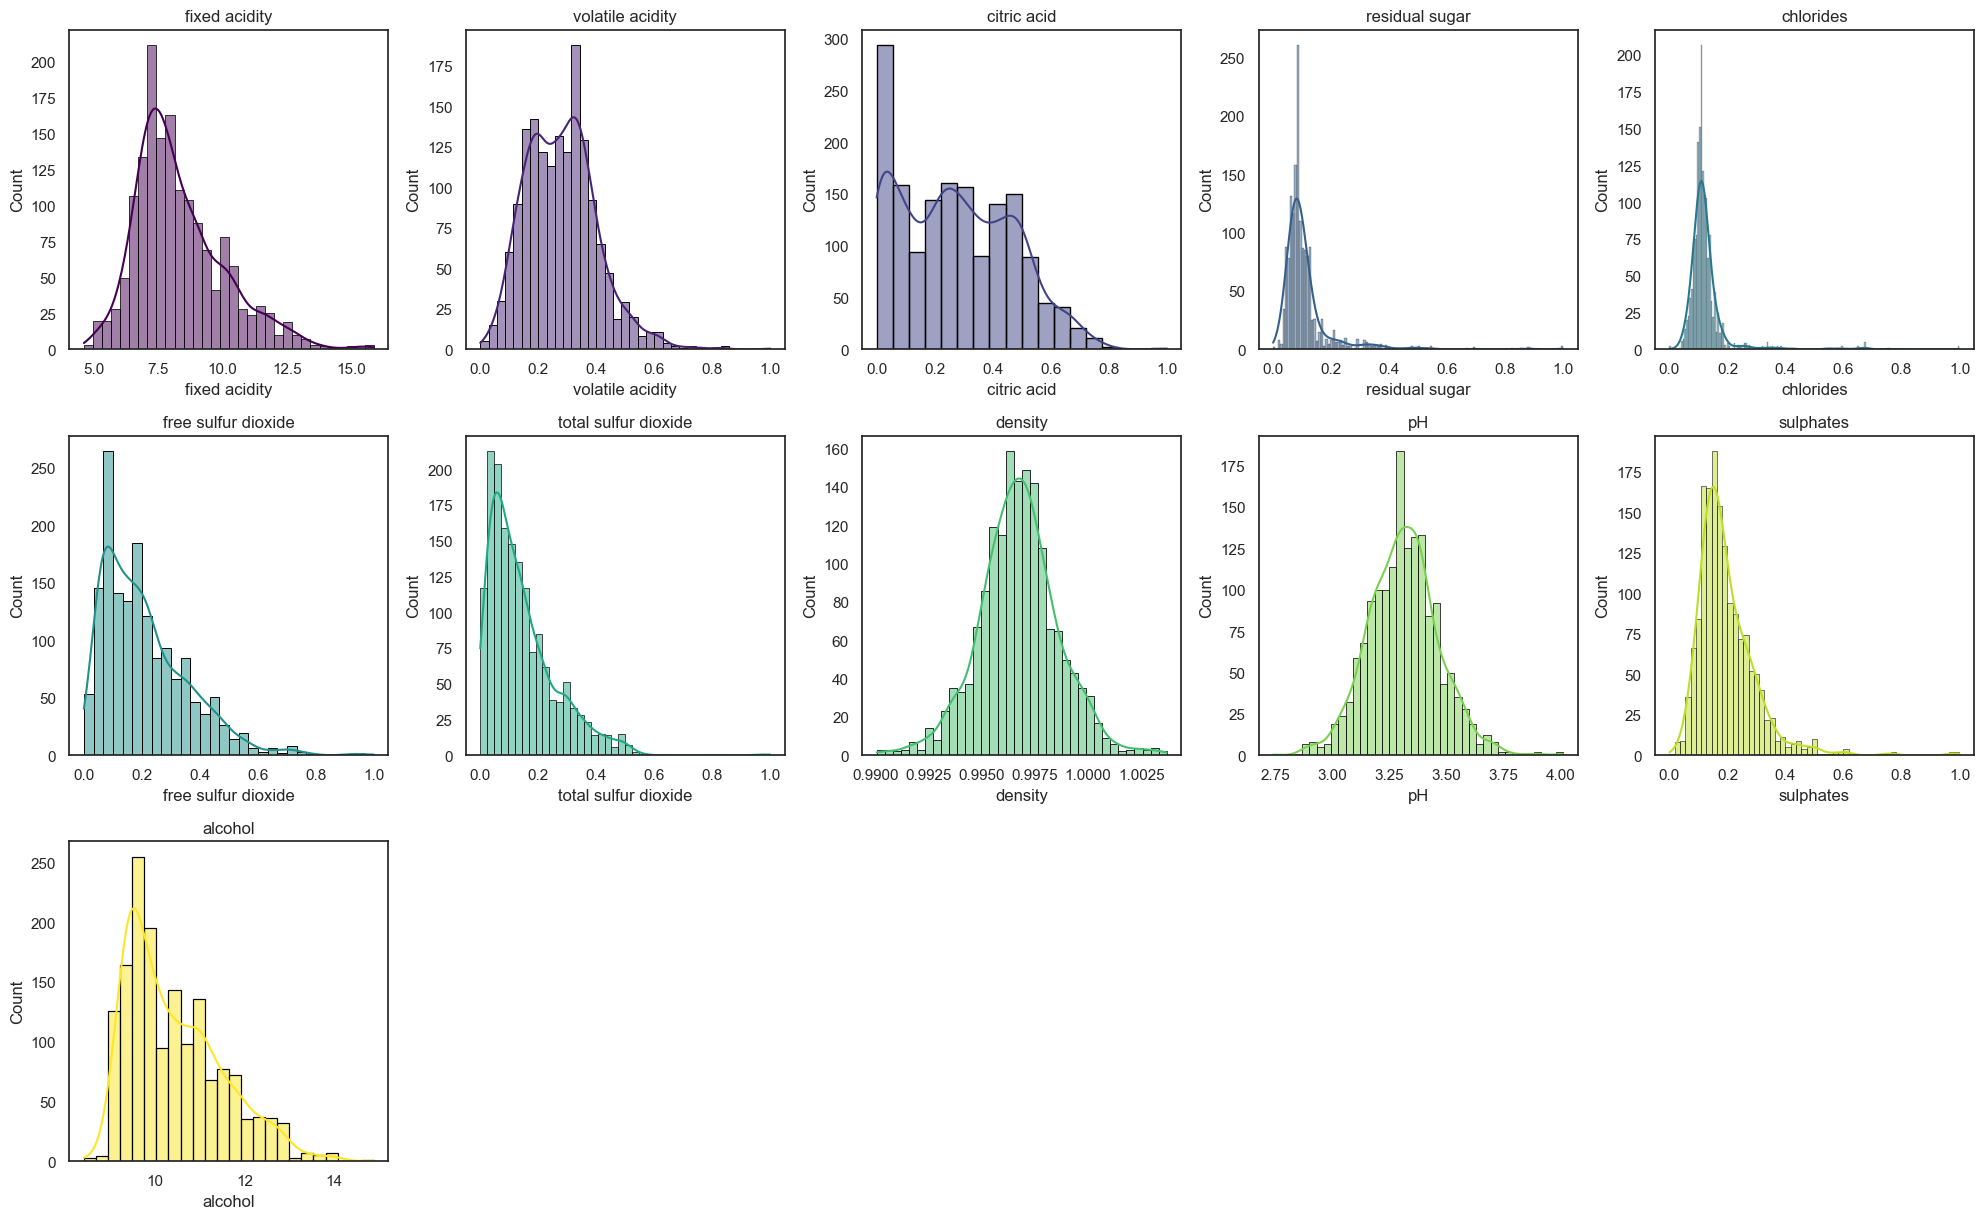

In [83]:
plt.figure(figsize=(20, 20))
sns.set(style="white", palette="muted")
colors = plt.cm.viridis(np.linspace(0, 1, len(X.columns)))

for i, col in enumerate(X.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(X[col], kde=True, color=colors[i], edgecolor="black")
    plt.title(col)
    plt.tight_layout()

plt.show()

## Build Model

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 39)

model = sm.OLS(endog=y_train, exog=X_train).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              9010.
Date:                Mon, 12 Aug 2024   Prob (F-statistic):                        0.00
Time:                        14:58:37   Log-Likelihood:                         -1243.6
No. Observations:                1279   AIC:                                      2509.
Df Residuals:                    1268   BIC:                                      2566.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

## Result

In [88]:
print(model.predict([
    7.4, 
    0.397260, 
    0.00, 
    0.068493, 
    0.106845, 
    0.140845, 
    0.098940, 
    0.99780, 
    3.51, 
    0.137725, 
    9.4
]))

[5.059997]
